In [27]:
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import Dense, Input, LSTM, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from keras.models import load_model
import warnings
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
warnings.filterwarnings(action='ignore')


In [2]:
%run "./preprocessing.ipynb"

Done !!


In [3]:
hour_data = e_commerce_fc_data[["품목수량"]].resample("1H").count()

In [4]:
hour_data

,품목수량
2021-03-01 00:00:00,386
2021-03-01 01:00:00,416
2021-03-01 02:00:00,522
2021-03-01 03:00:00,501
2021-03-01 04:00:00,412
...,...
2021-06-30 19:00:00,856
2021-06-30 20:00:00,990
2021-06-30 21:00:00,1097
2021-06-30 22:00:00,1154


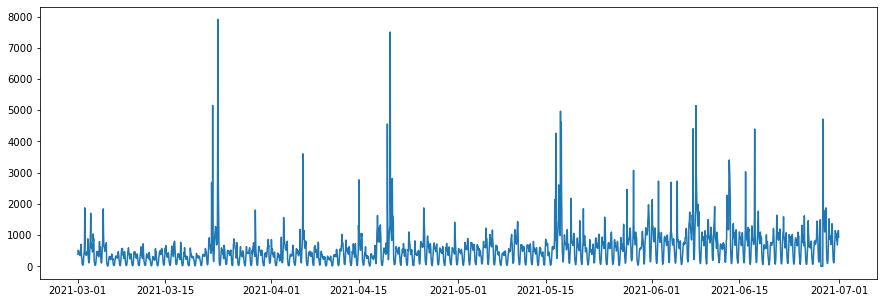

In [5]:
plt.figure(figsize=(15, 5))
plt.plot(hour_data)

In [6]:
## scale

scaler = MinMaxScaler()
scale_data = scaler.fit_transform(np.array(hour_data["품목수량"]).reshape(-1, 1))

scale_data = pd.DataFrame(scale_data)

In [7]:
## train test split 

train_set = scale_data.iloc[:2400, :]
test_set = scale_data.iloc[2400:, :]

In [8]:
## set window size
STEP = 12

def window_size(data, step):
    
    x, y = [], []
    for i in range(len(data)-step-1):
        x.append(data.iloc[i:(i+step), 0])
        y.append(data.iloc[i+step, 0]) 
        
    
    return np.array(x).reshape(len(x), step, 1), np.array(y)

In [9]:
train_x, train_y = window_size(train_set, STEP)
test_x, test_y = window_size(test_set, STEP)

In [10]:
### MAKE MODEL 
def setModel(batch_size, step):
    model = Sequential()
    model.add(LSTM(64, batch_input_shape = (batch_size, step, 1), stateful = True, return_sequences=True))
    model.add(LSTM(32, batch_input_shape = (batch_size, step, 1), stateful = True, return_sequences=True))
    model.add(LSTM(16, batch_input_shape = (batch_size, step, 1), stateful = True))
    model.add(Dense(1))

    model.compile(loss="mean_squared_error", metrics = ["mse"], optimizer="adam")
    
    return model 

In [11]:
### Callbacks 
CALLBACKS = [ModelCheckpoint(filepath="./server/model/model.h5", monitor="mse", save_best_only = True)]

In [12]:
### model Load 
batch_size = 1
model = setModel(batch_size, 12)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (1, 12, 64)               16896     
_________________________________________________________________
lstm_1 (LSTM)                (1, 12, 32)               12416     
_________________________________________________________________
lstm_2 (LSTM)                (1, 16)                   3136      
_________________________________________________________________
dense (Dense)                (1, 1)                    17        
Total params: 32,465
Trainable params: 32,465
Non-trainable params: 0
_________________________________________________________________


In [13]:
### model Train
model.fit(train_x, train_y, epochs=500, batch_size = batch_size, callbacks = CALLBACKS, verbose=1)

Epoch 1/500
2387/2387 [==============================] - 31s 10ms/step - loss: 0.0035 - mse: 0.0035
Epoch 2/500
2387/2387 [==============================] - 23s 10ms/step - loss: 0.0022 - mse: 0.0022
Epoch 3/500
2387/2387 [==============================] - 24s 10ms/step - loss: 0.0024 - mse: 0.0024
Epoch 4/500
2387/2387 [==============================] - 23s 10ms/step - loss: 0.0020 - mse: 0.0020
Epoch 5/500
2387/2387 [==============================] - 34s 14ms/step - loss: 0.0022 - mse: 0.0022
Epoch 6/500
2387/2387 [==============================] - 23s 10ms/step - loss: 0.0018 - mse: 0.0018
Epoch 7/500
2387/2387 [==============================] - 24s 10ms/step - loss: 0.0019 - mse: 0.0019
Epoch 8/500
2387/2387 [==============================] - 23s 10ms/step - loss: 0.0018 - mse: 0.0018
Epoch 9/500
2387/2387 [==============================] - 22s 9ms/step - loss: 0.0014 - mse: 0.0014
Epoch 10/500
2387/2387 [==============================] - 22s 9ms/step - loss: 0.0015 - mse: 0.0015
E

2387/2387 [==============================] - 24s 10ms/step - loss: 8.0961e-04 - mse: 8.0961e-04
Epoch 82/500
2387/2387 [==============================] - 26s 11ms/step - loss: 0.0012 - mse: 0.0012
Epoch 83/500
2387/2387 [==============================] - 24s 10ms/step - loss: 0.0012 - mse: 0.0012
Epoch 84/500
2387/2387 [==============================] - 25s 10ms/step - loss: 8.4724e-04 - mse: 8.4724e-04
Epoch 85/500
2387/2387 [==============================] - 26s 11ms/step - loss: 0.0011 - mse: 0.0011
Epoch 86/500
2387/2387 [==============================] - 26s 11ms/step - loss: 8.4161e-04 - mse: 8.4161e-04
Epoch 87/500
2387/2387 [==============================] - 27s 11ms/step - loss: 0.0011 - mse: 0.0011
Epoch 88/500
2387/2387 [==============================] - 25s 10ms/step - loss: 0.0013 - mse: 0.0013
Epoch 89/500
2387/2387 [==============================] - 25s 10ms/step - loss: 8.7219e-04 - mse: 8.7219e-04
Epoch 90/500
2387/2387 [==============================] - 22s 9ms/step -

2387/2387 [==============================] - 25s 10ms/step - loss: 6.7725e-04 - mse: 6.7725e-04
Epoch 157/500
2387/2387 [==============================] - 25s 10ms/step - loss: 7.0735e-04 - mse: 7.0735e-04
Epoch 158/500
2387/2387 [==============================] - 24s 10ms/step - loss: 8.2398e-04 - mse: 8.2398e-04
Epoch 159/500
2387/2387 [==============================] - 24s 10ms/step - loss: 6.0609e-04 - mse: 6.0609e-04
Epoch 160/500
2387/2387 [==============================] - 24s 10ms/step - loss: 6.8195e-04 - mse: 6.8195e-04
Epoch 161/500
2387/2387 [==============================] - 24s 10ms/step - loss: 7.8743e-04 - mse: 7.8743e-04
Epoch 162/500
2387/2387 [==============================] - 24s 10ms/step - loss: 5.1154e-04 - mse: 5.1154e-04
Epoch 163/500
2387/2387 [==============================] - 23s 10ms/step - loss: 6.5296e-04 - mse: 6.5296e-04
Epoch 164/500
2387/2387 [==============================] - 25s 10ms/step - loss: 9.4490e-04 - mse: 9.4490e-04
Epoch 165/500
2387/2387 

2387/2387 [==============================] - 23s 10ms/step - loss: 3.6793e-04 - mse: 3.6793e-04
Epoch 230/500
2387/2387 [==============================] - 23s 10ms/step - loss: 3.0210e-04 - mse: 3.0210e-04
Epoch 231/500
2387/2387 [==============================] - 23s 10ms/step - loss: 3.5645e-04 - mse: 3.5645e-04
Epoch 232/500
2387/2387 [==============================] - 23s 10ms/step - loss: 3.4592e-04 - mse: 3.4592e-04
Epoch 233/500
2387/2387 [==============================] - 23s 10ms/step - loss: 3.2807e-04 - mse: 3.2807e-04
Epoch 234/500
2387/2387 [==============================] - 23s 10ms/step - loss: 6.7058e-04 - mse: 6.7058e-04
Epoch 235/500
2387/2387 [==============================] - 23s 10ms/step - loss: 3.2897e-04 - mse: 3.2897e-04
Epoch 236/500
2387/2387 [==============================] - 23s 10ms/step - loss: 3.9069e-04 - mse: 3.9069e-04
Epoch 237/500
2387/2387 [==============================] - 23s 9ms/step - loss: 3.0916e-04 - mse: 3.0916e-04
Epoch 238/500
2387/2387 [

2387/2387 [==============================] - 34s 14ms/step - loss: 2.4191e-04 - mse: 2.4191e-04
Epoch 302/500
2387/2387 [==============================] - 34s 14ms/step - loss: 2.4276e-04 - mse: 2.4276e-04 1s - loss: 
Epoch 303/500
2387/2387 [==============================] - 43s 18ms/step - loss: 5.9349e-04 - mse: 5.9349e-04 0s - loss: 5.9348e-04 - mse: 5.9348e-
Epoch 304/500
2387/2387 [==============================] - 43s 18ms/step - loss: 2.4690e-04 - mse: 2.4690e-04
Epoch 305/500
2387/2387 [==============================] - 37s 15ms/step - loss: 2.3867e-04 - mse: 2.3867e-04
Epoch 306/500
2387/2387 [==============================] - 34s 14ms/step - loss: 3.8563e-04 - mse: 3.8563e-04
Epoch 307/500
2387/2387 [==============================] - 34s 14ms/step - loss: 1.7326e-04 - mse: 1.7326e-04
Epoch 308/500
2387/2387 [==============================] - 34s 14ms/step - loss: 1.6377e-04 - mse: 1.6377e-04
Epoch 309/500
2387/2387 [==============================] - 33s 14ms/step - loss: 2.8

2387/2387 [==============================] - 40s 17ms/step - loss: 3.5174e-04 - mse: 3.5174e-04
Epoch 372/500
2387/2387 [==============================] - 40s 17ms/step - loss: 2.8928e-04 - mse: 2.8928e-04
Epoch 373/500
2387/2387 [==============================] - 45s 19ms/step - loss: 1.3616e-04 - mse: 1.3616e-04
Epoch 374/500
2387/2387 [==============================] - 43s 18ms/step - loss: 1.8630e-04 - mse: 1.8630e-04
Epoch 375/500
2387/2387 [==============================] - 40s 17ms/step - loss: 1.9387e-04 - mse: 1.9387e-04
Epoch 376/500
2387/2387 [==============================] - 41s 17ms/step - loss: 1.5410e-04 - mse: 1.5410e-04 0s - loss: 1.5409e-04 - mse: 1.5409e-0
Epoch 377/500
2387/2387 [==============================] - 39s 16ms/step - loss: 2.2573e-04 - mse: 2.2573e-04
Epoch 378/500
2387/2387 [==============================] - 40s 17ms/step - loss: 1.4570e-04 - mse: 1.4570e-04 1s - los
Epoch 379/500
2387/2387 [==============================] - 42s 18ms/step - loss: 1.644

2387/2387 [==============================] - 41s 17ms/step - loss: 1.3962e-04 - mse: 1.3962e-04
Epoch 442/500
2387/2387 [==============================] - 34s 14ms/step - loss: 1.2807e-04 - mse: 1.2807e-04 0s - loss: 1.2793e-04 -
Epoch 443/500
2387/2387 [==============================] - 42s 18ms/step - loss: 1.3962e-04 - mse: 1.3962e-04 8s - loss: 1.4210e-04 - mse: 1.4210e- - ETA: 8s - loss: 1.4207e-04 - ETA: 0s - loss: 1.3980e-04 - mse: 1.3980e-0 - ETA: 0s - loss: 1.3978e-04 
Epoch 444/500
2387/2387 [==============================] - 42s 18ms/step - loss: 9.5695e-05 - mse: 9.5695e-05 0s - loss: 9.5447e-05 - mse: 9. - ETA: 0s - loss: 9.5567e-05 - mse:
Epoch 445/500
2387/2387 [==============================] - 35s 15ms/step - loss: 1.3332e-04 - mse: 1.3332e-04
Epoch 446/500
2387/2387 [==============================] - 36s 15ms/step - loss: 1.1770e-04 - mse: 1.1770e-04
Epoch 447/500
2387/2387 [==============================] - 37s 16ms/step - loss: 1.2568e-04 - mse: 1.2568e-04 2s - ETA:

In [28]:
save_model = load_model("./server/model/model.h5")

In [29]:
pred = save_model.predict(train_x, batch_size = batch_size)

mean_squared_error(pred, train_y), mean_absolute_error(pred, train_y)

(7.960066027725562e-05, 0.00592451556990674)

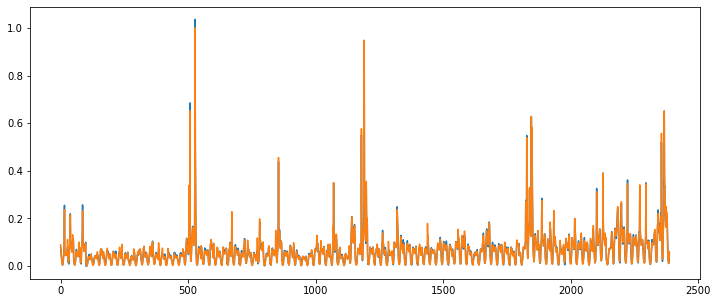

In [30]:
plt.figure(figsize=(12, 5))
plt.plot(pred)
plt.plot(train_y)

In [31]:
test_pred = save_model.predict(test_x, batch_size = batch_size)

mean_squared_error(test_pred, test_y), mean_absolute_error(test_pred, test_y)

(0.002584547702359563, 0.02436529070730054)

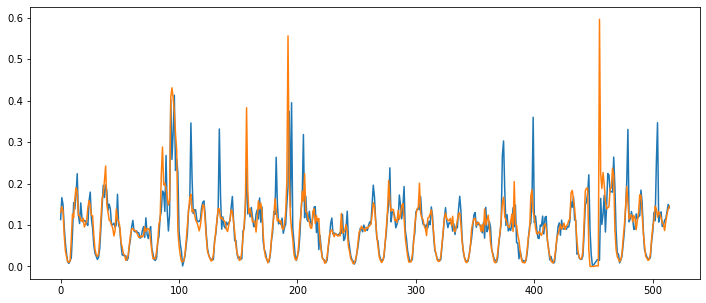

In [32]:
plt.figure(figsize=(12, 5))
plt.plot(test_pred)
plt.plot(test_y)